In [1]:
#Installing packages
!pip install scipy statsmodels quantecon pydsge

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install quantecon

Defaulting to user installation because normal site-packages is not writeable


In [28]:
!pip install pybats

Defaulting to user installation because normal site-packages is not writeable
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
   ---------------------------------------- 0.0/529.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/529.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/529.0 kB ? eta -:--:--
   ---------------------------------------- 529.0/529.0 kB 1.9 MB/s eta 0:00:00
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [22]:
#Importing packages
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
#Loading the data
data = pd.read_csv('Inflation.csv')

### Data Cleaning and Exploration

In [5]:
data.isnull().sum()

Date            0
CPI             0
CPI _rebased    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          328 non-null    object 
 1   CPI           328 non-null    float64
 2   CPI _rebased  328 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.8+ KB


In [7]:
# Loading the data into a dataframe

df = pd.DataFrame(data)

In [8]:
df.columns

Index(['Date', 'CPI', 'CPI _rebased'], dtype='object')

In [9]:
df.Date

0       9/1/1997
1      10/2/1997
2      11/2/1997
3      12/3/1997
4       1/3/1998
         ...    
323     8/1/2024
324     9/1/2024
325    10/1/2024
326    11/1/2024
327    12/1/2024
Name: Date, Length: 328, dtype: object

In [10]:
#Converting the date column to datetime

# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Setting 'Date' as the index
df.set_index('Date', inplace=True)

In [11]:
df.tail()

,CPI,CPI _rebased
Date,,
2024-08-01,229.4,229.4
2024-09-01,235.8,235.8
2024-10-01,237.8,237.8
2024-11-01,243.9,243.9
2024-12-01,248.3,248.3


In [19]:
# Set Date and Rate as columns

df = df.rename(columns={'Date': 'date', 'CPI': 'CPI', 'CPI _rebased': 'CPI_rebased'})

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328 entries, 1997-09-01 to 2024-12-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CPI          328 non-null    float64
 1   CPI_rebased  328 non-null    float64
dtypes: float64(2)
memory usage: 7.7 KB


In [20]:
# Setting the df['Rate] to numerical values

df['CPI_rebased'] = pd.to_numeric(df['CPI_rebased'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328 entries, 1997-09-01 to 2024-12-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CPI          328 non-null    float64
 1   CPI_rebased  328 non-null    float64
dtypes: float64(2)
memory usage: 7.7 KB


Text(0.5, 1.0, 'CPI till December 2024')

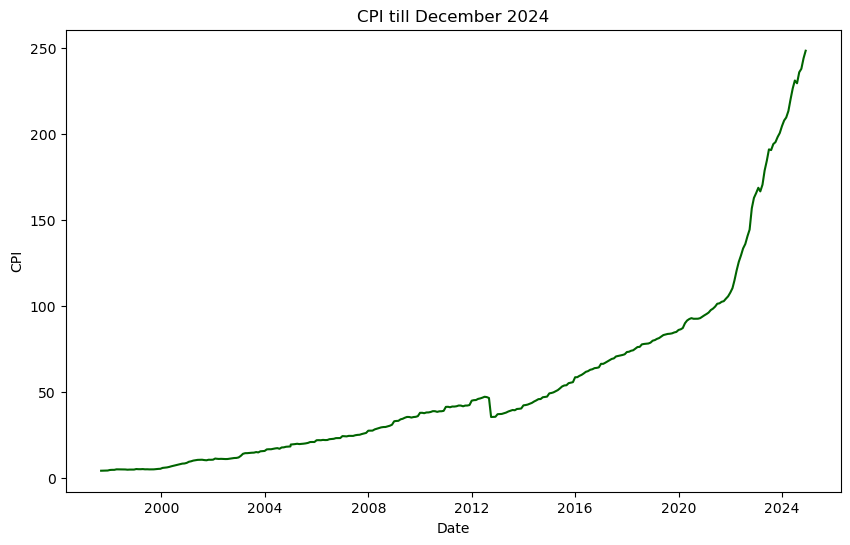

In [21]:
#Ploltting the inflation data in months

plt.figure(figsize=(10,6))

plt.plot(df.index, df['CPI_rebased'], label='CPI_Reweighted', color='darkgreen')

plt.xlabel('Date')

plt.ylabel('CPI')

plt.title('CPI till December 2024')


### ARIMA model

In [23]:
# Differencing to check stationarity
df['CPI_diff'] = df['CPI_rebased'].diff().dropna()

In [32]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize variables to store the best model and its AIC/BIC
best_aic = float("inf")
best_bic = float("inf")
best_order = None
best_model = None

# Iterate through different combinations of p, d, q
for p in range(10):
    for d in range(10):
        for q in range(10):
            try:
                # Fit the ARIMA model
                model = ARIMA(df['CPI_rebased'], order=(p, d, q))
                results = model.fit()

                # Check if the current model has the lowest AIC/BIC
                if results.aic < best_aic and results.bic < best_bic:
                    best_aic = results.aic
                    best_bic = results.bic
                    best_order = (p, d, q)
                    best_model = results
            except:
                continue

# Print the best model and its AIC/BIC
print(f"Best ARIMA model order: {best_order}")
print(f"Best AIC: {best_aic}")
print(f"Best BIC: {best_bic}")
print(best_model.summary())

Best ARIMA model order: (2, 3, 2)
Best AIC: 10.0
Best BIC: 28.919125911648685
                               SARIMAX Results                                
Dep. Variable:            CPI_rebased   No. Observations:                  328
Model:                 ARIMA(2, 3, 2)   Log Likelihood                   0.000
Date:                Tue, 11 Feb 2025   AIC                             10.000
Time:                        15:43:15   BIC                             28.919
Sample:                             0   HQIC                            17.551
                                - 328                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       5.594e-06   3.62e-08    154.575      0.000    5.52e-06    5.66e-06
ar.L2          1.0000   8.46e-08   1.18e+07      0.00

In [33]:
# Fit ARIMA Model (p=2, d=3, q=2) - Tune these values
model = ARIMA(df['CPI_rebased'], order=(2,3,2))  
arima_fit = model.fit()

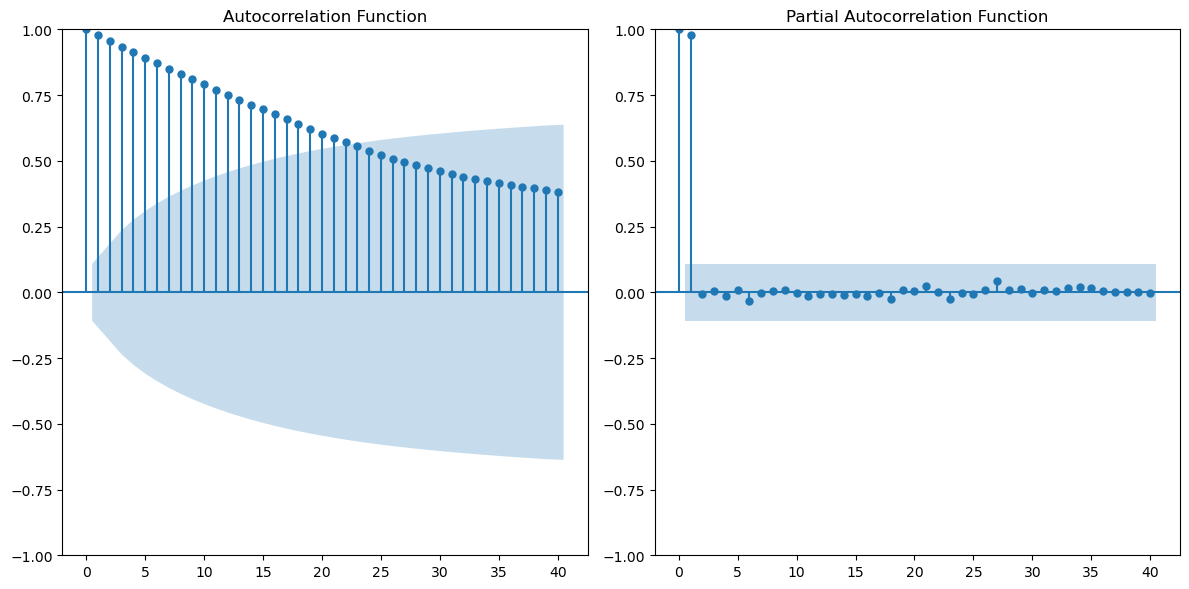

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['CPI_rebased'].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(df['CPI_rebased'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

### Modeling with Markov Switch Models (MSM)

In [16]:
# Defining the  MSM for Inflation
import statsmodels.api as sm

mod = sm.tsa.MarkovRegression(df['CPI'], k_regimes=2, trend='c', switching_variance=True)
res = mod.fit()

# Print Summary
print(res.summary())


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                    CPI   No. Observations:                  328
Model:               MarkovRegression   Log Likelihood               -1794.662
Date:                Fri, 07 Feb 2025   AIC                           3601.324
Time:                        13:35:09   BIC                           3624.082
Sample:                             0   HQIC                          3610.403
                                - 328                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.8610      0.749     59.907      0.000      43.393      46.329
sigma2        13.1371      4.873      2.696      0.0

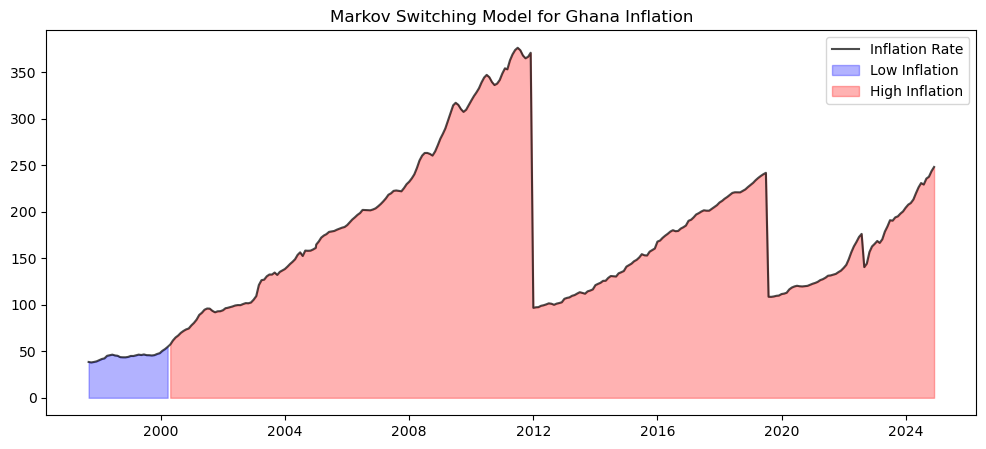

In [17]:
# Extracting Regimes and Visualizing

# Get Smoothed Probabilities
df["Low Inflation Regime"] = res.smoothed_marginal_probabilities[0]
df["High Inflation Regime"] = res.smoothed_marginal_probabilities[1]

# Plot Inflation & Regimes
plt.figure(figsize=(12,5))
plt.plot(df['CPI'], label="Inflation Rate", color='black', alpha=0.7)
plt.fill_between(df.index, df['CPI'], where=df["Low Inflation Regime"] > 0.5, color="blue", alpha=0.3, label="Low Inflation")
plt.fill_between(df.index, df['CPI'], where=df["High Inflation Regime"] > 0.5, color="red", alpha=0.3, label="High Inflation")
plt.legend()
plt.title("Markov Switching Model for Ghana Inflation")
plt.show()


#### SARIMA

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Check for staionarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["CPI"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("The series is non-stationary, differencing may be required.")
else:
    print("The series is stationary.")

ADF Statistic: -2.1190375877811403
p-value: 0.23692871343353422
The series is non-stationary, differencing may be required.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328 entries, 1997-09-01 to 2024-12-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CPI                    328 non-null    float64
 1   Low Inflation Regime   328 non-null    float64
 2   High Inflation Regime  328 non-null    float64
dtypes: float64(3)
memory usage: 10.2 KB


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = df.asfreq('ME')

# Handle missing values
df = df.dropna()

# Ensure sufficient observations
if len(df) < 24:  # At least 2 years of monthly data
    raise ValueError("Not enough observations. Ensure at least 24 months of data.")

# Define SARIMAX parameters
p, d, q = 1, 1, 1 
P, D, Q, s = 1, 1, 1, 12  # Seasonal order with 12-month seasonality

# Fit SARIMAX Model with error handling
try:
    model = SARIMAX(
        df['CPI'],  # Replace 'CPI' with your actual target column
        order=(p, d, q),
        seasonal_order=(P, D, Q, s),
        enforce_stationarity=False,
        enforce_invertibility=False
    )

    results = model.fit(maxiter=100, disp=False)  # Limit iterations

    print("Model fitted successfully!")
    print(results.summary())

except Exception as e:
    print(f"Error encountered: {e}")


ValueError: Not enough observations. Ensure at least 24 months of data.

In [164]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Assuming df is your DataFrame
df = df.asfreq('ME')

# Handle missing values
df = df.dropna()

# Ensure sufficient observations
if len(df) < 24:  # At least 2 years of monthly data
    print("Not enough observations. Ensure at least 24 months of data.")
else:
    # Define SARIMAX parameters
    p, d, q = 1, 1, 1 
    P, D, Q, s = 1, 1, 1, 12  # Seasonal order with 12-month seasonality

    # Fit SARIMAX Model with error handling
    try:
        model = SARIMAX(
            df['CPI'],  # Replace 'CPI' with your actual target column
            order=(p, d, q),
            seasonal_order=(P, D, Q, s),
            enforce_stationarity=False,
            enforce_invertibility=False
        )

        results = model.fit(maxiter=100, disp=False)  # Limit iterations

        print("Model fitted successfully!")
        print(results.summary())

    except Exception as e:
        print(f"Error encountered: {e}")

Not enough observations. Ensure at least 24 months of data.


### Markov Switching Model

C:\Users\reflectorm\AppData\Local\Temp\ipykernel_8252\2377546927.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq="M")[1:], forecast, label="Forecasted Inflation", linestyle="dashed", color="red")


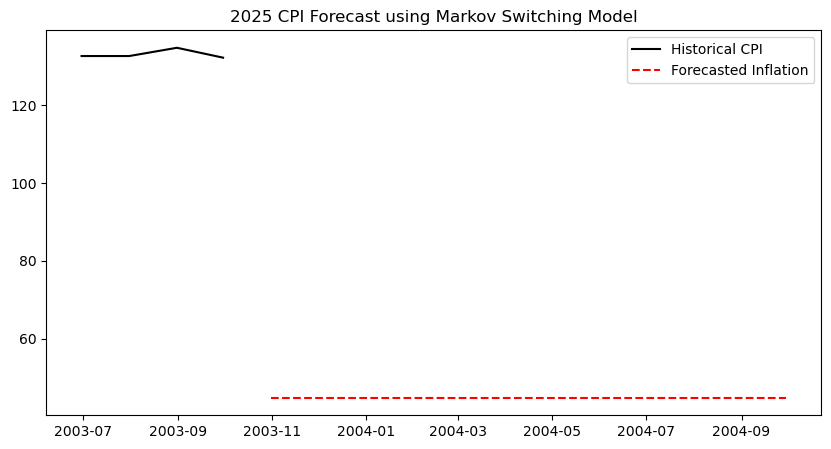

In [ ]:
#Future Predictions in 2025
forecast_steps = 12
forecast = res.predict(start=len(df), end=len(df) + forecast_steps - 1)

# Plot Forecast
plt.figure(figsize=(10,5))
plt.plot(df.index[-50:], df['CPI'].iloc[-20:], label="Historical CPI", color="black")
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq="M")[1:], forecast, label="Forecasted Inflation", linestyle="dashed", color="red")
plt.legend()
plt.title("2025 CPI Forecast using Markov Switching Model")
plt.show()


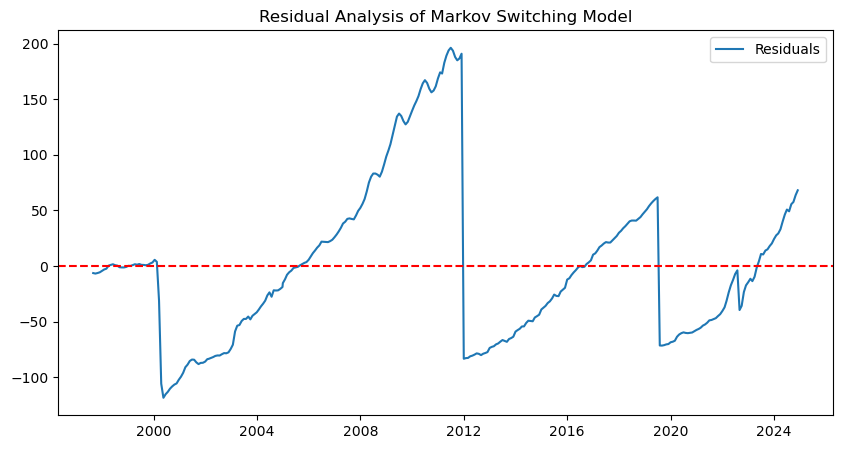

In [29]:
# Checking for residuals

residuals = res.resid
plt.figure(figsize=(10,5))
plt.plot(residuals, label="Residuals")
plt.axhline(y=0, color='red', linestyle="dashed")
plt.legend()
plt.title("Residual Analysis of Markov Switching Model")
plt.show()


##### Remodelling the prediction

In [35]:
#Identify the last estimated regime
import numpy as np

last_regime = np.argmax(res.smoothed_marginal_probabilities.iloc[-1])


In [36]:
# Get historical inflation values for each regime
inflation_regime_means = res.smoothed_marginal_probabilities.mul(df['CPI'], axis=0).sum(axis=0) / res.smoothed_marginal_probabilities.sum(axis=0)

In [37]:
# Generate Forecasts Based on Last Regime's Mean and Standard Deviation
forecast_steps = 12
np.random.seed(42)  # For reproducibility
forecast = np.random.normal(
    loc=inflation_regime_means[last_regime], 
    scale=df['CPI'].std(),  # Assumed constant variance
    size=forecast_steps
)

In [38]:
#Creating Future Date Range
forecast_dates = pd.date_range(df.index[-1], periods=forecast_steps+1, freq="ME")[1:]

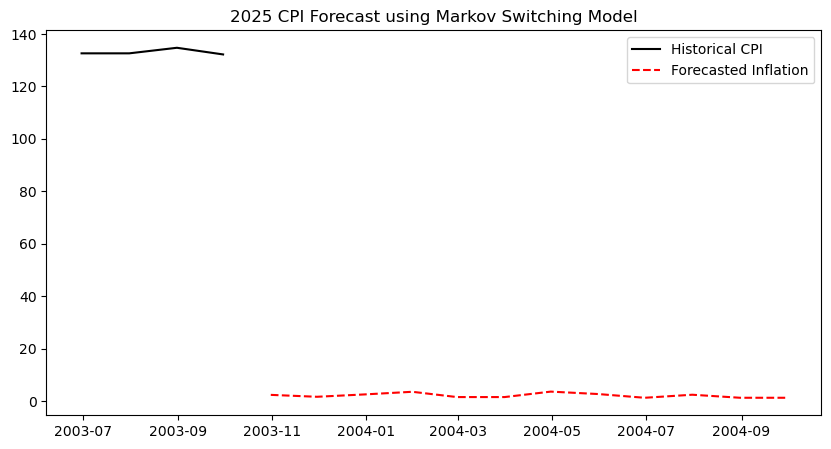

In [39]:
# Ploting Results
plt.figure(figsize=(10,5))
plt.plot(df.index[-50:], df['CPI'].iloc[-50:], label="Historical CPI", color="black")
plt.plot(forecast_dates, forecast, label="Forecasted Inflation", linestyle="dashed", color="red")
plt.legend()
plt.title("2025 CPI Forecast using Markov Switching Model")
plt.show()

In [40]:
# Forecasted inflation
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Inflation Rate': forecast
})

# Print the DataFrame
print(forecast_df)

         Date  Forecasted Inflation Rate
0  2003-10-31                   2.360313
1  2003-11-30                   1.631857
2  2003-12-31                   2.533513
3  2004-01-31                   3.537717
4  2004-02-29                   1.521852
5  2004-03-31                   1.521870
6  2004-04-30                   3.602171
7  2004-05-31                   2.670887
8  2004-06-30                   1.251888
9  2004-07-31                   2.412908
10 2004-08-31                   1.258836
11 2004-09-30                   1.256184


In [42]:
# Calculate the standard deviation of the rate
rate_std = df['CPI'].std()

# Calculate the lower bounds of the forecasts
lower_bounds = forecast - rate_std

# Create a DataFrame to store the lower bounds
lower_bounds_df = pd.DataFrame({
    'Date': forecast_dates,
    'Lower Bound': lower_bounds
})

# Print the DataFrame
print(lower_bounds_df)

         Date  Lower Bound
0  2003-10-31     1.213099
1  2003-11-30     0.484643
2  2003-12-31     1.386299
3  2004-01-31     2.390503
4  2004-02-29     0.374638
5  2004-03-31     0.374656
6  2004-04-30     2.454957
7  2004-05-31     1.523673
8  2004-06-30     0.104674
9  2004-07-31     1.265694
10 2004-08-31     0.111622
11 2004-09-30     0.108970


In [44]:
# Merge forecast_df and lower_bounds_df on the 'Date' column
merged_df = pd.merge(forecast_df, lower_bounds_df, on='Date')

# Print the merged DataFrame
print(merged_df)

         Date  Forecasted Inflation Rate  Lower Bound
0  2025-01-31                   0.313693     0.198958
1  2025-02-28                   0.240839     0.126104
2  2025-03-31                   0.331015     0.216280
3  2025-04-30                   0.431447     0.316712
4  2025-05-31                   0.229837     0.115102
5  2025-06-30                   0.229839     0.115104
6  2025-07-31                   0.437893     0.323159
7  2025-08-31                   0.344754     0.230019
8  2025-09-30                   0.202838     0.088103
9  2025-10-31                   0.318953     0.204218
10 2025-11-30                   0.203532     0.088798
11 2025-12-31                   0.203267     0.088532
